In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree


titaninc_df = pd.read_csv('C:/Users/user/Documents/ML/titanic/train.csv')
titaninc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


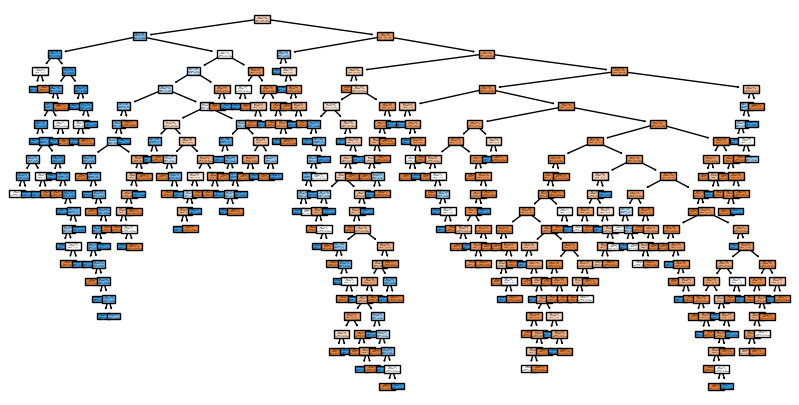

In [31]:
X_features = ['Pclass','Sex','Age','Fare','Embarked']
#Pclass: LabelEncoder
#Sex: LabelEncoder
#Age: 결측치-> 평균으로 대치하고 

le = LabelEncoder()
titaninc_df['Sex'] = le.fit_transform(titaninc_df['Sex'])

le2 = LabelEncoder()
titaninc_df['Pclass'] = le2.fit_transform(titaninc_df['Pclass'])

age_mean = titaninc_df['Age'].mean()
titaninc_df['Age'] = titaninc_df['Age'].fillna(age_mean)

le3 = LabelEncoder()
titaninc_df['Embarked'] = titaninc_df['Embarked'].fillna('S')
titaninc_df['Embarked'] = le3.fit_transform(titaninc_df['Embarked'])


X = titaninc_df[X_features]
y = titaninc_df['Survived']

model_dt = DecisionTreeClassifier()
model_dt.fit(X,y)

plt.figure(figsize = (10,5))
plot_tree(model_dt, feature_names=X_features, class_names=['Not Survived','Survived'], filled= True)
plt.show()

In [32]:
# 로지스틱회귀, 의사결정나무, 랜덤포레스트

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score

model_lor = LogisticRegression()
model_dt = DecisionTreeClassifier(random_state=42)
model_rf = RandomForestClassifier(random_state=42)

model_lor.fit(X,y)
model_dt.fit(X,y)
model_rf.fit(X,y)

y_lor_pred = model_lor.predict(X)
y_dt_pred = model_dt.predict(X)
y_rf_pred = model_rf.predict(X)

def get_score(model_name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred).round(3)
    f1 = f1_score(y_true,y_pred).round(3)
    print(model_name, 'acc 스코어는: ',acc, 'f1_score는: ', f1)
    
get_score('lor',y,y_lor_pred)
get_score('dt ',y,y_dt_pred)
get_score('rf ',y,y_rf_pred)

lor acc 스코어는:  0.79 f1_score는:  0.723
dt  acc 스코어는:  0.98 f1_score는:  0.973
rf  acc 스코어는:  0.98 f1_score는:  0.973


In [33]:
X_features

['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']

In [34]:
model_rf.feature_importances_

array([0.0991363 , 0.27159751, 0.28905477, 0.30707067, 0.03314074])

In [35]:
# 최근접 이웃, 부스팅 모델 적용

In [36]:
# !pip install xgboost
# !pip install lightgbm

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

model_knn = KNeighborsClassifier()
model_gbm = GradientBoostingClassifier(random_state= 42)
model_xgb = XGBClassifier(random_state= 42)
model_lgb = LGBMClassifier(random_state= 42)

model_knn.fit(X,y)
model_gbm.fit(X,y)
model_xgb.fit(X,y)
model_lgb.fit(X,y)

y_knn_pred = model_knn.predict(X)
y_gbm_pred = model_gbm.predict(X)
y_xgb_pred = model_xgb.predict(X)
y_lgb_pred = model_lgb.predict(X)

get_score('lor',y,y_lor_pred)
get_score('dt ',y,y_dt_pred)
get_score('rf ',y,y_rf_pred)
get_score('knn',y,y_knn_pred)
get_score('gbm ',y,y_gbm_pred)
get_score('xgb ',y,y_xgb_pred)
get_score('lgb ',y,y_lgb_pred)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
lor acc 스코어는:  0.79 f1_score는:  0.723
dt  acc 스코어는:  0.98 f1_score는:  0.973
rf  acc 스코어는:  0.98 f1_score는:  0.973
knn acc 스코어는:  0.808 f1_score는:  0.732
gbm  acc 스코어는:  0.889 f1_score는:  0.845
xgb  acc 스코어는:  0.962 f1_score는:  0.949
lgb  acc 스코어는:  0.945 f1_score는:  0.927
